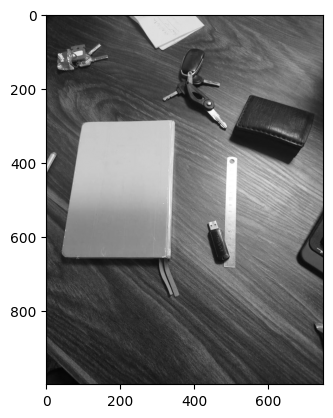

In [19]:
import cv2
import matplotlib.pyplot as plt

img2 = cv2.imread('/content/13.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img2,cmap='gray')


In [20]:
img_90  = cv2.rotate(img2, cv2.ROTATE_90_CLOCKWISE)
img_180 = cv2.rotate(img2, cv2.ROTATE_180)
img_270 = cv2.rotate(img2, cv2.ROTATE_90_COUNTERCLOCKWISE)

rotated_images = {
    "90 deg": img_90,
    "180 deg": img_180,
    "270 deg": img_270
}

In [21]:
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_L2)

90 deg → Number of good matches: 1505


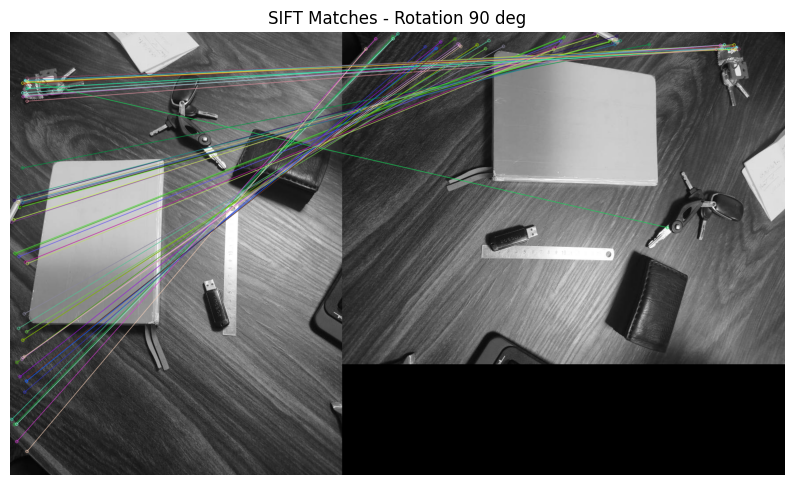

180 deg → Number of good matches: 1483


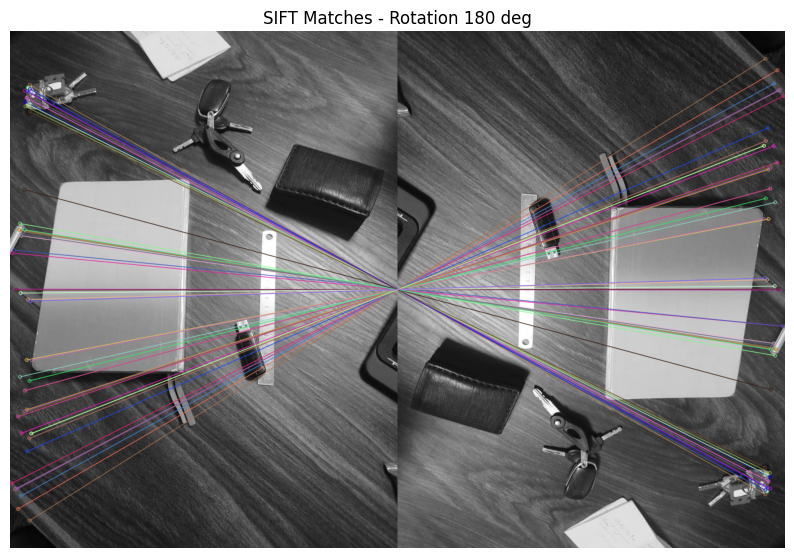

270 deg → Number of good matches: 1514


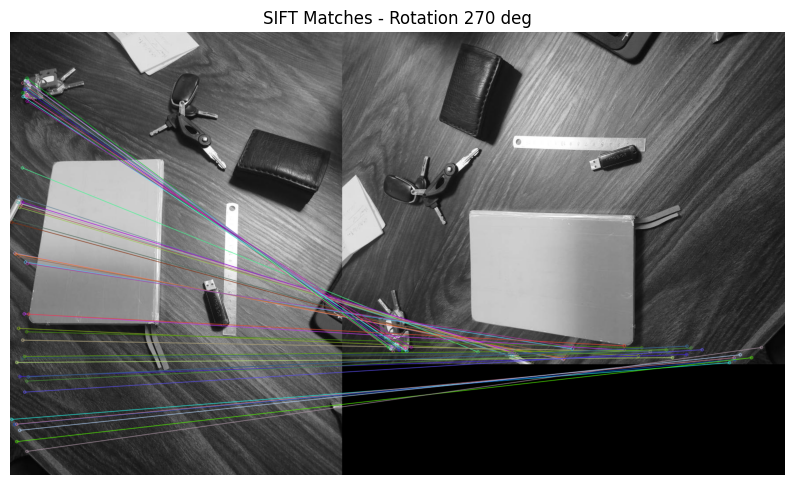

In [23]:
for name, img_rot in rotated_images.items():

    kp2, des2 = sift.detectAndCompute(img_rot, None)

    matches = bf.knnMatch(des1, des2, k=2)


    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    print(f"{name} → Number of good matches: {len(good_matches)}")


    matched_img = cv2.drawMatches(
        img2, kp1,
        img_rot, kp2,
        good_matches[:50], None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )


    plt.figure(figsize=(10,15))
    plt.title(f"SIFT Matches - Rotation {name}")
    plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()